In [1]:
import numpy as np
from numpy.random import seed
seed(13)

from numpyNET.nn import Model
from numpyNET.layers import Dense, Sigmoid
from numpyNET.optimizer import SGD
from numpyNET.error import Error, MAE
from numpyNET.data_loader import BatchIterator
from numpyNET.train import train, predict

# Bank Note Authentication Dataset

Get the dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt).

### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


### Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

### Prepare Training and Test Sets

In [2]:
TXT_FILE = "./dataset/data_banknote_authentication.txt"

In [3]:
def extract_data_from_txt(txt):
    f = open(txt, "r")
    dataset = []
    for x in f:
        x = x.split(",")
        x[-1] = x[-1].split("\n")[0]
        for i in range(len(x)):
            x[i] = float(x[i])
        dataset.append(np.array(x))
    return np.array(dataset)

In [4]:
dataset = extract_data_from_txt(TXT_FILE)
print(dataset[:5])
print(dataset[-5:])

features = dataset[:, :4]
labels = dataset[:, 4:5]
print(f"\nTotal number of observations: {labels.shape[0]}\n       Positive observations:  {int(np.sum(labels))}\n       Negative observations:  {labels.shape[0]-int(np.sum(labels))}")

[[ 3.6216   8.6661  -2.8073  -0.44699  0.     ]
 [ 4.5459   8.1674  -2.4586  -1.4621   0.     ]
 [ 3.866   -2.6383   1.9242   0.10645  0.     ]
 [ 3.4566   9.5228  -4.0112  -3.5944   0.     ]
 [ 0.32924 -4.4552   4.5718  -0.9888   0.     ]]
[[  0.40614   1.3492   -1.4501   -0.55949   1.     ]
 [ -1.3887   -4.8773    6.4774    0.34179   1.     ]
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]

Total number of observations: 1372
       Positive observations:  610
       Negative observations:  762


In [5]:
train_features = []
test_features = []

train_labels = []
test_labels = []

for i in range(labels.shape[0]):
    if np.random.rand() < 0.75 :
        train_features.append(features[i,:])
        train_labels.append(labels[i])
    else:
        test_features.append(features[i,:])
        test_labels.append(labels[i])

train_features = np.array(train_features)
test_features = np.array(test_features)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(1043, 4)
(329, 4)
(1043, 1)
(329, 1)


### Design and Train a Model

0 4.603727063510926
5 4.433619642758644
10 0.39283073629797377
15 0.34607262202603606
20 0.11997009817495874
25 0.11945232297442028
30 0.0994591082477828
35 0.08882351424076351
40 0.06016774653983711
45 0.06133479059395108


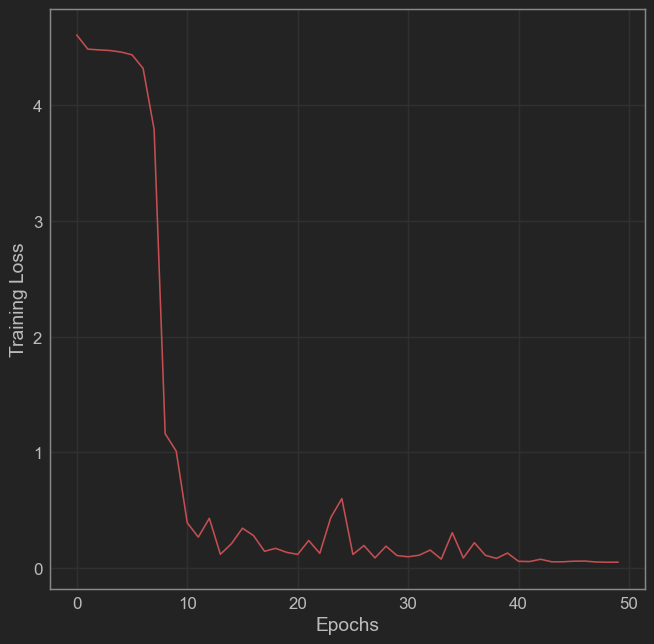

In [6]:
# Designing a Model
model = Model([
    Dense(input_size=4, output_size=2),
    Sigmoid(),
    Dense(input_size=2, output_size=1),
    Sigmoid()
])

# Model Hyperparameters
num_epochs = 50
optim = SGD(learn_rate=0.1)
batch_size = 128
err = MAE()

# Training
history = train(
    model, train_features, train_labels, plotting=True,
    epochs=num_epochs, optimizer=optim, err=err,
    iterator=BatchIterator(batch_size=batch_size)
)

def confidence(X, Y, network):
    prediction = predict(network, X)
    return (1.0 - (np.sum(np.abs(prediction - Y)) / prediction.shape[0]))

def print_missclassified(X, Y, network):
    count = 0
    prediction = predict(network, X)
    for x, pred, y in zip(X, prediction, Y):
        if np.round_(pred-y) != 0:
            print(f"Data point {x} missclassifed with confidence {pred}. Should be {y}")
            count += 1
    print(f"{count} data points missclassified")

### Calculate training confidence

In [7]:
print(100*confidence(train_features, train_labels, model))

99.35827362749264


In [8]:
print_missclassified(train_features, train_labels, model)

Data point [ 0.3292 -4.4552  4.5718 -0.9888] missclassifed with confidence [0.9994015]. Should be [0.]
Data point [ 0.5195 -3.2633  3.0895 -0.9849] missclassifed with confidence [0.99969052]. Should be [0.]
Data point [ 0.3292 -4.4552  4.5718 -0.9888] missclassifed with confidence [0.9994015]. Should be [0.]
Data point [ 0.5195 -3.2633  3.0895 -0.9849] missclassifed with confidence [0.99969052]. Should be [0.]
Data point [ 0.3292 -4.4552  4.5718 -0.9888] missclassifed with confidence [0.9994015]. Should be [0.]
Data point [ 0.5195 -3.2633  3.0895 -0.9849] missclassifed with confidence [0.99969052]. Should be [0.]
6 data points missclassified


### Calculate testing confidence

In [9]:
print(100*confidence(test_features, test_labels, model))

98.7268761550525


In [10]:
print_missclassified(test_features, test_labels, model)

Data point [ 0.32924 -4.4552   4.5718  -0.9888 ] missclassifed with confidence [0.99940137]. Should be [0.]
Data point [ 0.3292 -4.4552  4.5718 -0.9888] missclassifed with confidence [0.9994015]. Should be [0.]
Data point [ 0.5195 -3.2633  3.0895 -0.9849] missclassifed with confidence [0.99969052]. Should be [0.]
Data point [ 0.51947 -3.2633   3.0895  -0.98492] missclassifed with confidence [0.99969056]. Should be [0.]
4 data points missclassified
